In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('weather_data.csv')
# collected almost 18 months of data in boulder
df.shape

(13104, 17)

In [3]:
df.head()

,Time,Temp_c,Wind_mph,Wind_degree,Wind_dir,Is_day,Condition,Precip_mm,Visib_miles,Humidity,Cloud,Feels_like_c,Dew_point_c,UV,Total_snow_cm,Chance_of_rain,Chance_of_snow
0,00:00,-7.0,5.6,259,W,0,Clear,0.0,0.0,6.0,77,0,-12.2,-10.3,-7.0,0,0
1,01:00,-6.7,5.6,255,WSW,0,Clear,0.0,0.0,6.0,75,0,-11.9,-10.3,-6.7,0,0
2,02:00,-6.4,5.8,248,WSW,0,Clear,0.0,0.0,6.0,73,0,-11.5,-10.5,-6.4,0,0
3,03:00,-5.4,5.6,250,WSW,0,Clear,0.0,0.0,6.0,64,0,-10.6,-11.1,-5.4,0,0
4,04:00,-5.0,5.6,252,WSW,0,Clear,0.0,0.0,6.0,63,0,-10.0,-10.8,-5.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13104 entries, 0 to 13103
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Time            13104 non-null  object 
 1   Temp_c          13104 non-null  float64
 2   Wind_mph        13104 non-null  float64
 3   Wind_degree     13104 non-null  int64  
 4   Wind_dir        13104 non-null  object 
 5   Is_day          13104 non-null  int64  
 6   Condition       13104 non-null  object 
 7   Precip_mm       13104 non-null  float64
 8   Visib_miles     13104 non-null  float64
 9   Humidity        13104 non-null  float64
 10  Cloud           13104 non-null  int64  
 11  Feels_like_c    13104 non-null  int64  
 12  Dew_point_c     13104 non-null  float64
 13  UV              13104 non-null  float64
 14  Total_snow_cm   13104 non-null  float64
 15  Chance_of_rain  13104 non-null  int64  
 16  Chance_of_snow  13104 non-null  int64  
dtypes: float64(8), int64(6), object

In [5]:
df.nunique()
# no.of unique values in each column

Time               24
Temp_c            300
Wind_mph          130
Wind_degree       361
Wind_dir           16
Is_day              2
Condition          32
Precip_mm          66
Visib_miles        48
Humidity            7
Cloud              78
Feels_like_c      101
Dew_point_c       376
UV                291
Total_snow_cm     300
Chance_of_rain     63
Chance_of_snow     72
dtype: int64

In [6]:
sum(df.duplicated())
# It's understandable to have these many duplicates because as it's hourly data, same values might be repeated.

8064

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.shape
# we still have 7 months of data - each day, hourly observations

(5040, 17)

In [9]:
df['Chance_of_snow'].value_counts()
# almost 70% of data has chance_of_snow values as zero

0     3637
79      46
68      43
75      42
82      41
      ... 
94       1
93       1
92       1
91       1
95       1
Name: Chance_of_snow, Length: 72, dtype: int64

In [10]:
df.isnull().sum()
# we don't have any null values

Time              0
Temp_c            0
Wind_mph          0
Wind_degree       0
Wind_dir          0
Is_day            0
Condition         0
Precip_mm         0
Visib_miles       0
Humidity          0
Cloud             0
Feels_like_c      0
Dew_point_c       0
UV                0
Total_snow_cm     0
Chance_of_rain    0
Chance_of_snow    0
dtype: int64

In [11]:
# just looking at the attributes 
df.iloc[0]

Time              00:00
Temp_c             -7.0
Wind_mph            5.6
Wind_degree         259
Wind_dir              W
Is_day                0
Condition         Clear
Precip_mm           0.0
Visib_miles         0.0
Humidity            6.0
Cloud                77
Feels_like_c          0
Dew_point_c       -12.2
UV                -10.3
Total_snow_cm      -7.0
Chance_of_rain        0
Chance_of_snow        0
Name: 0, dtype: object

## Observing categorical columns

In [12]:
# categorical columns
categoricals = list(df.select_dtypes(['object']).columns) 
categoricals

['Time', 'Wind_dir', 'Condition']

In [13]:
# by looking into the data attributes we can say that Is-day is also a cateogorical
categoricals.append('Is_day')
categoricals

['Time', 'Wind_dir', 'Condition', 'Is_day']

In [14]:
# looking at each of the categorical attribute
for each in categoricals:
    print('for', each, 'column - ') 
    print(df[each].value_counts()) 
    print('--------------------------')

for Time column - 
00:00    210
01:00    210
22:00    210
21:00    210
20:00    210
19:00    210
18:00    210
17:00    210
16:00    210
15:00    210
14:00    210
13:00    210
12:00    210
11:00    210
10:00    210
09:00    210
08:00    210
07:00    210
06:00    210
05:00    210
04:00    210
03:00    210
02:00    210
23:00    210
Name: Time, dtype: int64
--------------------------
for Wind_dir column - 
W      744
WSW    516
SW     399
NNE    318
WNW    317
SSW    313
ESE    291
NW     286
E      286
NE     262
N      258
NNW    236
SSE    210
SE     203
ENE    202
S      199
Name: Wind_dir, dtype: int64
--------------------------
for Condition column - 
Overcast                               847
Clear                                  808
Sunny                                  568
Partly cloudy                          540
Heavy snow                             490
Cloudy                                 327
Moderate snow                          264
Light snow                           

In [15]:
# 'Time' column doesn't make much sense as all of the values are uniformly distributed and also there are 24 different
# categories, it's not good to create 23 new columns as well. So, we are going to delete this column

df.drop(['Time','Total_snow_cm'], axis = 1, inplace = True)
df.shape

(5040, 15)

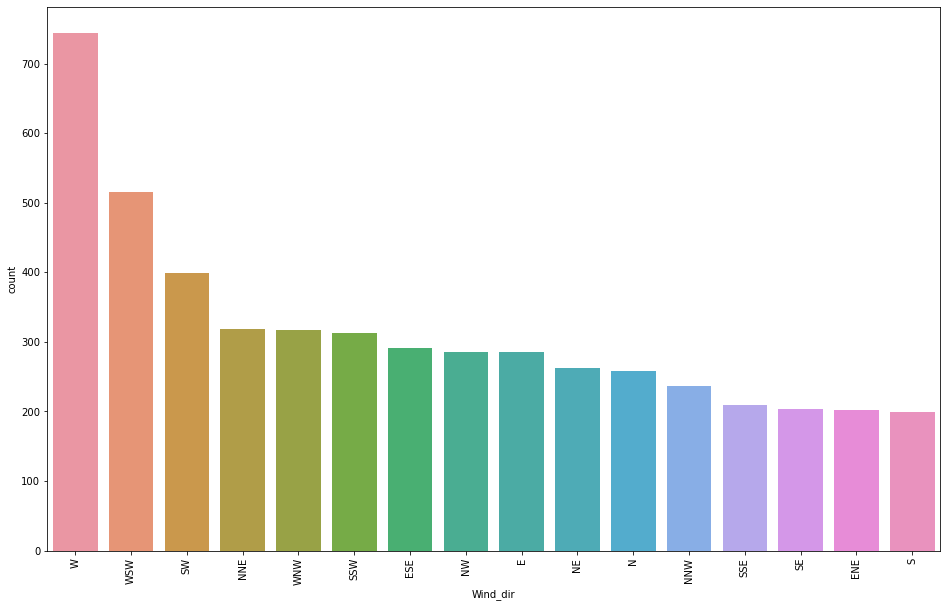

In [16]:
# For 'wind_dir' column

plt.figure(figsize = (16,10))
sns.countplot(data = df, x = df['Wind_dir'], order = df['Wind_dir'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

In [17]:
# we are having 16 categories in this column - having these mant isn't preferrable, better to convert them into 4 
# W, E, N, S - 4 directions

df['Wind_dir'] = df['Wind_dir'].apply(lambda x: x[0])
df['Wind_dir'].value_counts()

W    1577
N    1360
S    1324
E     779
Name: Wind_dir, dtype: int64

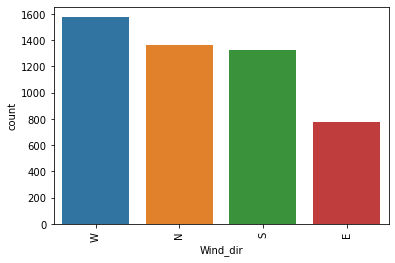

In [18]:
# wind_dir column after transformations

sns.countplot(data = df, x = df['Wind_dir'], order = df['Wind_dir'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

In [19]:
# now, we will create dummies for this wind_dir variable
dummies = pd.get_dummies(df['Wind_dir'], drop_first = True)
df = pd.concat([df.drop('Wind_dir', axis = 1), dummies], axis = 1)
df.shape

(5040, 17)

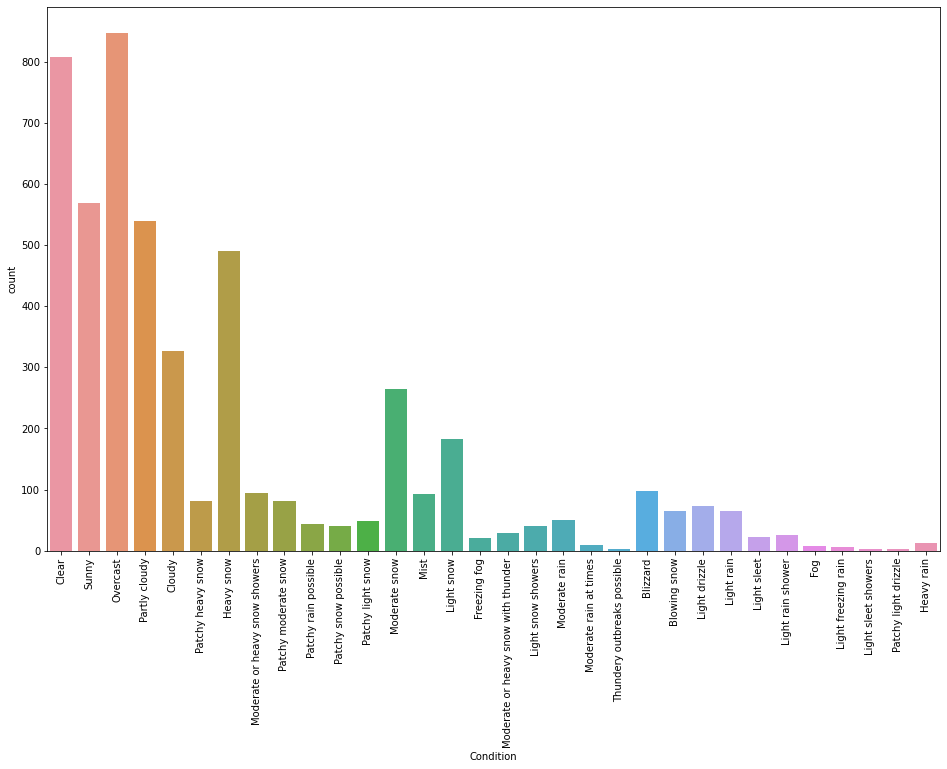

In [20]:
# For 'condition' column

plt.figure(figsize = (16,10))
sns.countplot(data = df, x = df['Condition'])
plt.xticks(rotation = 90)
plt.show()

In [21]:
# 'condition' column has 32 categories and around 15 categories have occurred in more than 100 rows, So having these
# many categories isn't good and also the 'condition' will be more or less covered by the remaining climatic values 
# along with 'cloud' column. So, we can delete this column
df.drop('Condition', axis = 1, inplace = True)
df.shape

(5040, 16)

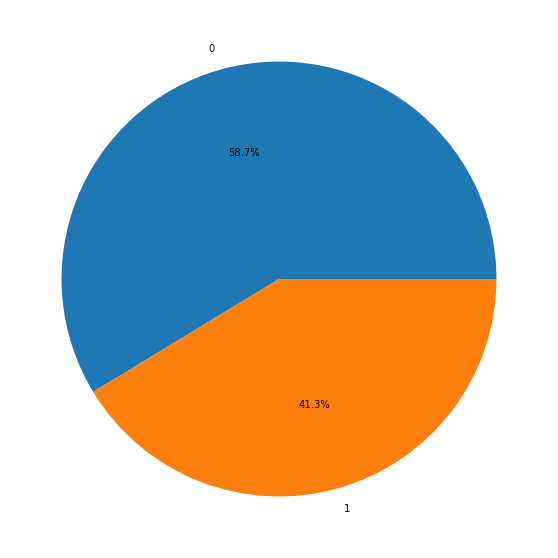

In [22]:
# plotting for 'Is_day' column

plt.figure(figsize = (16,10))
plt.pie(df['Is_day'].value_counts().values, labels = df['Is_day'].value_counts().index, autopct='%1.1f%%')
plt.show()

In [23]:
# Is_day column, we will try to see if this has any realtion with target lable
df.groupby(by = 'Is_day')['Chance_of_snow'].mean()

Is_day
0    17.726842
1    17.934678
Name: Chance_of_snow, dtype: float64

In [24]:
# we can see that whether it's day or night, it's not having much of an impact on the snow - so, we will delete 
# this column as well
df.drop('Is_day', axis = 1, inplace = True)
df.shape

(5040, 15)

## Observing Numerical columns

In [25]:
numericals = [x for x in df.columns if x not in categoricals] 
numericals

['Temp_c',
 'Wind_mph',
 'Wind_degree',
 'Precip_mm',
 'Visib_miles',
 'Humidity',
 'Cloud',
 'Feels_like_c',
 'Dew_point_c',
 'UV',
 'Chance_of_rain',
 'Chance_of_snow',
 'N',
 'S',
 'W']

In [26]:
# updating the numericals
numericals.remove('N')
numericals.remove('S')
numericals.remove('W')
numericals

['Temp_c',
 'Wind_mph',
 'Wind_degree',
 'Precip_mm',
 'Visib_miles',
 'Humidity',
 'Cloud',
 'Feels_like_c',
 'Dew_point_c',
 'UV',
 'Chance_of_rain',
 'Chance_of_snow']

In [27]:
df[numericals].corr()
# finding correlations between columns

,Temp_c,Wind_mph,Wind_degree,Precip_mm,Visib_miles,Humidity,Cloud,Feels_like_c,Dew_point_c,UV,Chance_of_rain,Chance_of_snow
Temp_c,1.000000,0.123029,-0.012667,0.156219,-0.067398,0.077167,-0.142863,-0.016715,0.950379,0.807330,0.379728,-0.128745
Wind_mph,0.123029,1.000000,0.308688,0.118403,-0.102242,-0.175280,-0.065457,0.190910,-0.160623,0.106888,0.273279,-0.104067
Wind_degree,-0.012667,0.308688,1.000000,-0.049593,-0.122376,-0.003528,-0.159557,-0.040115,-0.118563,-0.090396,0.068325,-0.109774
Precip_mm,0.156219,0.118403,-0.049593,1.000000,0.438514,-0.314920,0.280035,0.248939,0.129796,0.297303,0.414938,0.230771
Visib_miles,-0.067398,-0.102242,-0.122376,0.438514,1.000000,-0.310470,0.322992,0.225501,-0.018750,0.113775,0.013431,0.431591
Humidity,0.077167,-0.175280,-0.003528,-0.314920,-0.310470,1.000000,-0.468558,-0.521275,0.099538,-0.190875,-0.165405,-0.609253
Cloud,-0.142863,-0.065457,-0.159557,0.280035,0.322992,-0.468558,1.000000,0.638181,-0.082921,0.459291,0.228642,0.418183
Feels_like_c,-0.016715,0.190910,-0.040115,0.248939,0.225501,-0.521275,0.638181,1.000000,-0.041336,0.358708,0.256069,0.436347
Dew_point_c,0.950379,-0.160623,-0.118563,0.129796,-0.018750,0.099538,-0.082921,-0.041336,1.000000,0.785852,0.312926,-0.072004
UV,0.807330,0.106888,-0.090396,0.297303,0.113775,-0.190875,0.459291,0.358708,0.785852,1.000000,0.477131,0.112209


In [28]:
df[numericals].describe()
# looking at the statistical measures  of each column

,Temp_c,Wind_mph,Wind_degree,Precip_mm,Visib_miles,Humidity,Cloud,Feels_like_c,Dew_point_c,UV,Chance_of_rain,Chance_of_snow
count,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000
mean,-2.643492,9.217341,193.527778,0.234881,1.037238,4.584722,75.077976,62.382540,-7.128889,-6.816369,6.083532,17.812698
std,5.347029,5.600060,100.571508,0.716096,2.117256,2.034034,16.839178,38.582007,6.699129,5.667752,19.263106,30.478323
min,-20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,-30.800000,-22.000000,0.000000,0.000000
25%,-5.700000,4.900000,104.000000,0.000000,0.000000,3.000000,64.000000,20.000000,-10.500000,-10.500000,0.000000,0.000000
50%,-1.900000,8.300000,220.000000,0.000000,0.090000,6.000000,77.000000,78.000000,-6.100000,-6.100000,0.000000,0.000000
75%,0.800000,12.300000,272.000000,0.100000,1.360000,6.000000,90.000000,100.000000,-2.800000,-2.800000,0.000000,27.000000
max,12.300000,30.200000,360.000000,10.200000,18.790000,6.000000,99.000000,100.000000,12.400000,8.300000,89.000000,99.000000


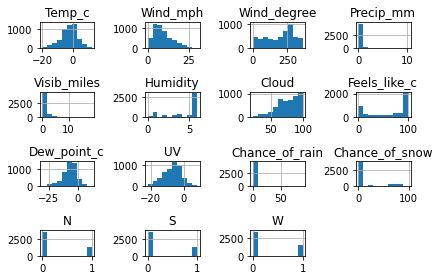

In [29]:
df.hist()
plt.tight_layout()

## what columns should I deal with after looking at this?

In [30]:
# checking for outliers
for each in numericals:
    print(each, np.abs(df[each].skew()))
    
# precipitation, visibility in miles, Chance_of_rain have a fair bit of outliers that should be definitely handled

Temp_c 0.45429195804910455
Wind_mph 0.8698414472572658
Wind_degree 0.3574581468540831
Precip_mm 6.225353597460663
Visib_miles 4.54978288824567
Humidity 1.0504097127381904
Cloud 0.6452336117951147
Feels_like_c 0.496546647778523
Dew_point_c 0.6779593195992186
UV 0.2677712174527687
Chance_of_rain 3.0510529795361014
Chance_of_snow 1.2789942047244913


In [31]:
### For visib_miles and Precip_mm columns, I have discretized them below into three categories each

<AxesSubplot:>

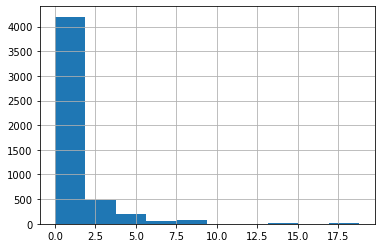

In [32]:
df['Visib_miles'].hist()
## almost 50% of the data values have visible miles as 0 

In [33]:
print(len(df[df['Visib_miles']<=1]))
df[df['Visib_miles']<=1]['Chance_of_snow'].value_counts().head()

# out of 2232 observations where there was no visibility there was no snow in 2142 observaions - so, visibility of 
# zero is more or less no chance of snow

3552


0     3033
21      24
79      17
26      14
63      14
Name: Chance_of_snow, dtype: int64

In [34]:
print(len(df[df['Visib_miles']>4]))
df[df['Visib_miles']>4]['Chance_of_snow'].value_counts().head()

# out of 2808 observations where there was some visibility distance, 50% observations had 

288


0     73
77     9
84     8
83     8
70     8
Name: Chance_of_snow, dtype: int64

In [35]:
# It's better to discretize the columns into three bins of values <1, 1-4, >4
df['Visib_miles_bin'] = pd.cut(df['Visib_miles'], bins=[-0.1, 1, 4, 20], 
                          labels=[1,2,3])

In [36]:
df['Visib_miles_bin'].value_counts()

1    3552
2    1200
3     288
Name: Visib_miles_bin, dtype: int64

In [37]:
df[['Precip_mm','Chance_of_snow']].corr()
# resonable correlation, so don't delete this column

,Precip_mm,Chance_of_snow
Precip_mm,1.000000,0.230771
Chance_of_snow,0.230771,1.000000


<AxesSubplot:>

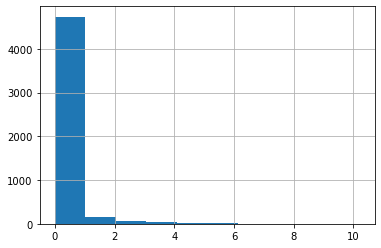

In [38]:
df['Precip_mm'].hist()

In [39]:
print(len(df[df['Precip_mm']==0]))
df[df['Precip_mm']==0]['Chance_of_snow'].value_counts().head()

3277


0     3200
21      14
27      11
26       9
28       9
Name: Chance_of_snow, dtype: int64

In [40]:
print(len(df[df['Precip_mm']>2]))
df[df['Precip_mm']>2]['Chance_of_snow'].value_counts().head()

143


0     82
68     6
70     4
69     4
65     3
Name: Chance_of_snow, dtype: int64

In [41]:
## we can observe that 0, 0-2, >2 seems to be best values to discretize
df['Precip_mm'] = pd.cut(df['Precip_mm'], bins=[-0.01, 0.01, 2, 10], 
                          labels=[1,2,3])

In [42]:
df['Precip_mm'].value_counts()

1    3277
2    1620
3     142
Name: Precip_mm, dtype: int64

### Looking at the chance_of_rain column

Text(0.5, 1.0, 'Distribution of Chance_of_rain values')

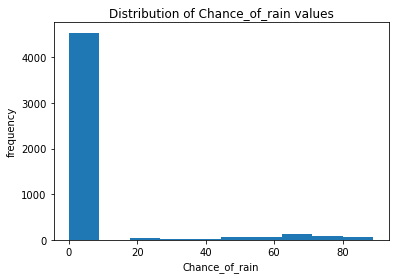

In [43]:
plt.hist(df['Chance_of_rain'])
plt.xlabel('Chance_of_rain')
plt.ylabel('frequency')
plt.title('Distribution of Chance_of_rain values')

In [44]:
# I am creating a new column to represent whether it will rain or not which will only have 2 categories
# as it's difficult to use or either transform Chance_of_rain because too many values are at 0(almost 90%)

df['rain_or_not'] = np.where(df['Chance_of_rain'] == 0, 0, 1)

#### No more outliers

## Scatter plots of variables 

[Text(0.5, 1.0, 'Temperature vs Dew point')]

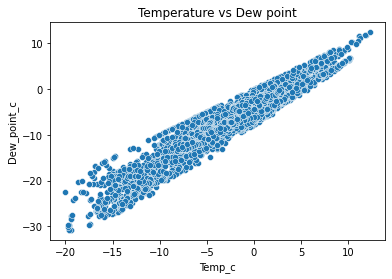

In [45]:
sns.scatterplot(x = 'Temp_c', y = 'Dew_point_c', data = df).set(title='Temperature vs Dew point')

# More temperatures leads to higher Dew point values

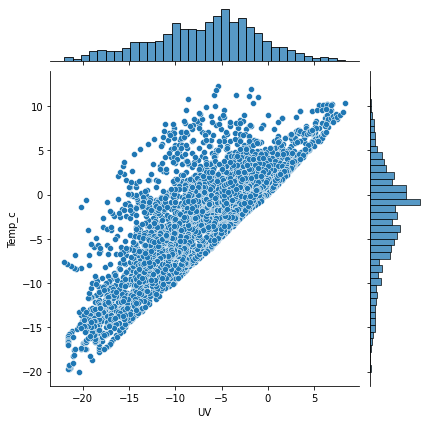

In [46]:
sns.jointplot(x = 'UV', y = 'Temp_c', data = df)

# more UV rays in the climate refers to higher temperatures and both the Temp_c and UV column are normally distributed

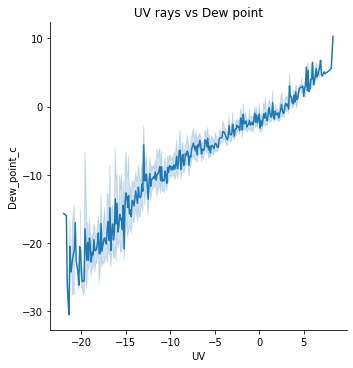

In [47]:
sns.relplot(data = df, x = 'UV', y = 'Dew_point_c', kind = 'line').set(title='UV rays vs Dew point')

# Higher UV values tends to Higher Dew point values

### After looking at the above three graphs we can say that Temperature, UV rays and dew point values are strongly related with each other

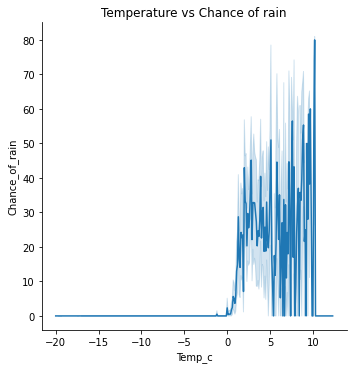

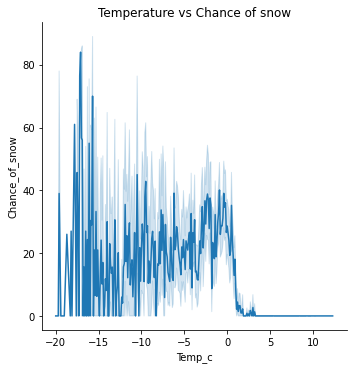

In [48]:
sns.relplot(data = df, x = 'Temp_c', y = 'Chance_of_rain', kind = 'line').set(title='Temperature vs Chance of rain')
sns.relplot(data = df, x = 'Temp_c', y = 'Chance_of_snow', kind = 'line').set(title='Temperature vs Chance of snow')
# rain more often than not occurs in between 0 and 10 temperatures

## we can see from the above two graphs that temperatures below 0 degrees celsius leads to snow and above that till 10 degrees leads to more of rain

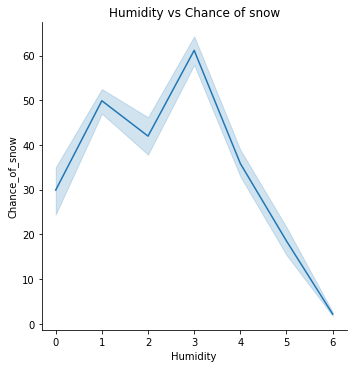

In [49]:
sns.relplot(data = df, x = 'Humidity', y = 'Chance_of_snow', kind = 'line').set(title='Humidity vs Chance of snow')

# lower Humidity values leads to more chance of snow fall

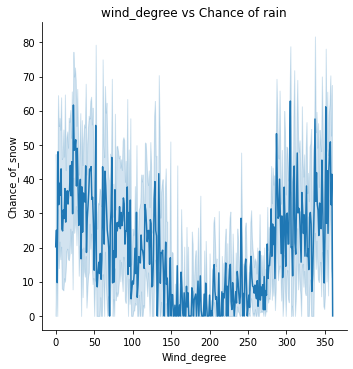

In [50]:
sns.relplot(data = df, x = 'Wind_degree', y = 'Chance_of_snow', kind = 'line').set(title='wind_degree vs Chance of rain')

# lesser wind_degree leads to more chance of snow

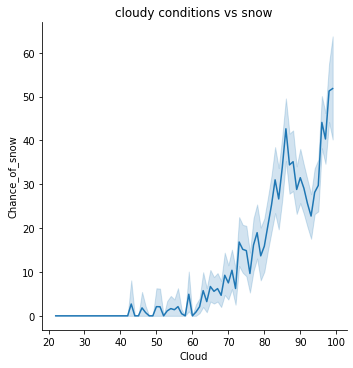

In [51]:
sns.relplot(data = df, x = 'Cloud', y = 'Chance_of_snow', kind = 'line').set(title='cloudy conditions vs snow')

# Clear representation which shows higher cloud values leads to high chance of snow

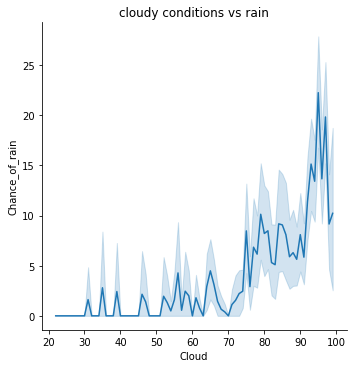

In [52]:
sns.relplot(data = df, x = 'Cloud', y = 'Chance_of_rain', kind = 'line').set(title='cloudy conditions vs rain')

# This graph is opposite to the above graph which on the whole says --> more cloudy conditions leads to higher chances
# of snow but it doesn't mean large amount of snow fall will happen.

## relationship of attributes with target label

<AxesSubplot:>

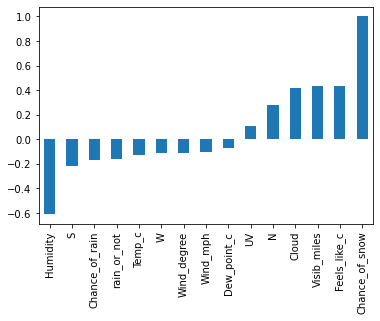

In [53]:
# which attributes are mostly related to our targer column - 'Chance_of_snow'?
df.corr()['Chance_of_snow'].sort_values().plot(kind = 'bar')

## Humidity, visib_miles, Feels_like_c, Clous, Precip_mm, N, S columns seems to be having some sort of impact on 
# the target label.

[Text(0.5, 1.0, 'Humidity vs chance of snow')]

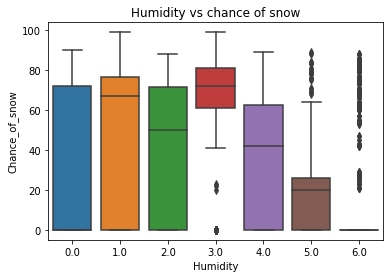

In [54]:
sns.boxplot(x = 'Humidity', y = 'Chance_of_snow',data =df).set(title='Humidity vs chance of snow')
# not exact relation but lower humidity values leads to slightly better chances of snow

[Text(0.5, 1.0, 'Rain vs snow')]

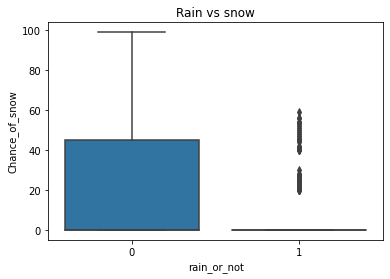

In [55]:
sns.boxplot(x = 'rain_or_not', y = 'Chance_of_snow',data =df).set(title='Rain vs snow')
# having a climate which has better chances of rain has a tendency of having snow fall as well

## Normalizations

In [56]:
df.head()

,Temp_c,Wind_mph,Wind_degree,Precip_mm,Visib_miles,Humidity,Cloud,Feels_like_c,Dew_point_c,UV,Chance_of_rain,Chance_of_snow,N,S,W,Visib_miles_bin,rain_or_not
0,-7.0,5.6,259,1,0.0,6.0,77,0,-12.2,-10.3,0,0,0,0,1,1,0
1,-6.7,5.6,255,1,0.0,6.0,75,0,-11.9,-10.3,0,0,0,0,1,1,0
2,-6.4,5.8,248,1,0.0,6.0,73,0,-11.5,-10.5,0,0,0,0,1,1,0
3,-5.4,5.6,250,1,0.0,6.0,64,0,-10.6,-11.1,0,0,0,0,1,1,0
4,-5.0,5.6,252,1,0.0,6.0,63,0,-10.0,-10.8,0,0,0,0,1,1,0


In [57]:
# wind degree values and Cloud values are in higher scale compared to other attributes - will use MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
df[["Cloud"]] = MinMaxScaler().fit_transform(df[['Cloud']])

In [58]:
df[["Wind_degree"]] = MinMaxScaler().fit_transform(df[['Wind_degree']])

In [59]:
df.head()

## Final Data frame after all the pre-processing

,Temp_c,Wind_mph,Wind_degree,Precip_mm,Visib_miles,Humidity,Cloud,Feels_like_c,Dew_point_c,UV,Chance_of_rain,Chance_of_snow,N,S,W,Visib_miles_bin,rain_or_not
0,-7.0,5.6,0.719444,1,0.0,6.0,0.714286,0,-12.2,-10.3,0,0,0,0,1,1,0
1,-6.7,5.6,0.708333,1,0.0,6.0,0.688312,0,-11.9,-10.3,0,0,0,0,1,1,0
2,-6.4,5.8,0.688889,1,0.0,6.0,0.662338,0,-11.5,-10.5,0,0,0,0,1,1,0
3,-5.4,5.6,0.694444,1,0.0,6.0,0.545455,0,-10.6,-11.1,0,0,0,0,1,1,0
4,-5.0,5.6,0.700000,1,0.0,6.0,0.532468,0,-10.0,-10.8,0,0,0,0,1,1,0


In [60]:
df['snow_or_not'] = np.where(df['Chance_of_snow'] == 0, 0, 1)
df['snow_or_not'].value_counts()

0    3637
1    1403
Name: snow_or_not, dtype: int64

In [61]:
df.columns

Index(['Temp_c', 'Wind_mph', 'Wind_degree', 'Precip_mm', 'Visib_miles',
       'Humidity', 'Cloud', 'Feels_like_c', 'Dew_point_c', 'UV',
       'Chance_of_rain', 'Chance_of_snow', 'N', 'S', 'W', 'Visib_miles_bin',
       'rain_or_not', 'snow_or_not'],
      dtype='object')

# Clustering

### It's generally recommended to use kmeans clustering on data with spherical distributions of data points. I don't have any of those kinds in my data set. Just for understanding and visualizing purposes I am performing a clustering with 2 columns which are linearly correlated.

In [62]:
df_clustering = df[['Temp_c','Dew_point_c']]
df_clustering.head()

,Temp_c,Dew_point_c
0,-7.0,-12.2
1,-6.7,-11.9
2,-6.4,-11.5
3,-5.4,-10.6
4,-5.0,-10.0


In [63]:
df_clustering.to_csv('Snow_cluster.csv')

In [64]:
df_clustering['Temp_c'] = df_clustering['Temp_c'].apply(lambda x :
                                                (x-df_clustering['Temp_c'].mean())/df_clustering['Temp_c'].std())

/var/folders/lk/w47mq6ns57345rf6qxwfyqz80000gn/T/ipykernel_6545/21584814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering['Temp_c'] = df_clustering['Temp_c'].apply(lambda x :


In [65]:
df_clustering['Dew_point_c'] = df_clustering['Dew_point_c'].apply(lambda x : 
                                        (x-df_clustering['Dew_point_c'].mean())/df_clustering['Dew_point_c'].std())

/var/folders/lk/w47mq6ns57345rf6qxwfyqz80000gn/T/ipykernel_6545/2261073598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering['Dew_point_c'] = df_clustering['Dew_point_c'].apply(lambda x :


In [66]:
df_clustering.head()

,Temp_c,Dew_point_c
0,-0.814753,-0.756981
1,-0.758647,-0.712199
2,-0.702541,-0.652490
3,-0.515521,-0.518144
4,-0.440714,-0.428580


In [67]:
df_clustering.shape

(5040, 2)

In [68]:
from sklearn.cluster import KMeans
inertias = []
K = range(1, 10) 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df_clustering)
    inertias.append(kmeanModel.inertia_)

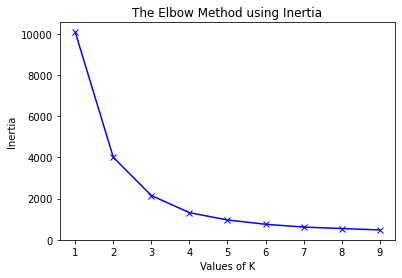

In [69]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

### Elbow graph above shows that any of 2, 3, 4 number of clusters might be a better fit for the data. 

### Visualizing kmeans with 2 clusters 

In [70]:
km = KMeans(n_clusters=2, max_iter=300)
km.fit(df_clustering)
label=km.predict(df_clustering)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temp_c', ylabel='Dew_point_c'>

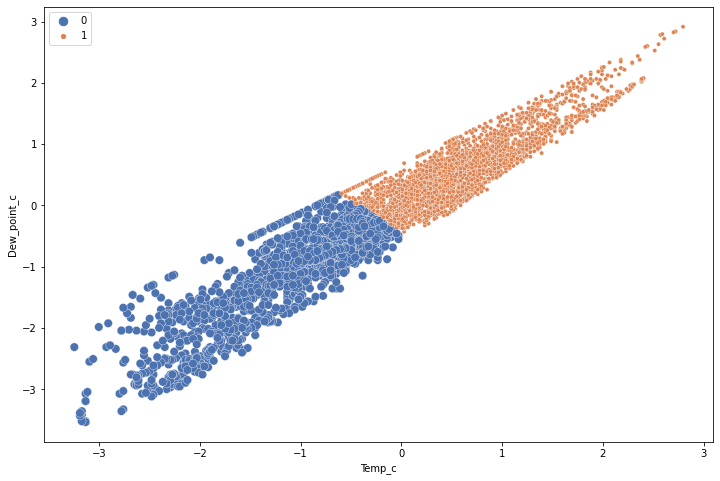

In [71]:
plt.figure(figsize = (12,8))
sns.scatterplot(df_clustering['Temp_c'], df_clustering['Dew_point_c'], hue = km.labels_, palette="deep", 
                size=km.labels_)

### Visualizing kmeans with 3 clusters 

In [72]:
km = KMeans(n_clusters=3, max_iter=300)
km.fit(df_clustering)
label=km.predict(df_clustering)

In [73]:
km.cluster_centers_

array([[-1.78240909, -1.85493606],
       [ 0.8336407 ,  0.80404815],
       [-0.32342069, -0.26749783]])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temp_c', ylabel='Dew_point_c'>

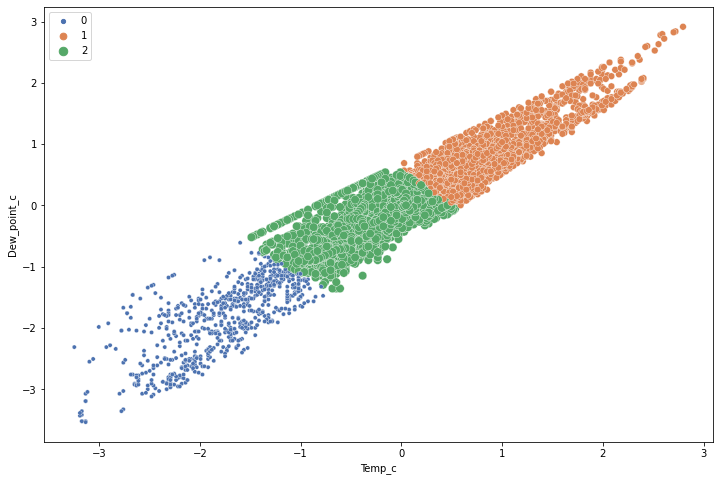

In [74]:
plt.figure(figsize = (12,8))
sns.scatterplot(df_clustering['Temp_c'], df_clustering['Dew_point_c'], hue = km.labels_, palette="deep", 
                size=km.labels_)

### Visualizing kmeans with 4 clusters 

In [75]:
km = KMeans(n_clusters=4, max_iter=300)
km.fit(df_clustering)
label=km.predict(df_clustering)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temp_c', ylabel='Dew_point_c'>

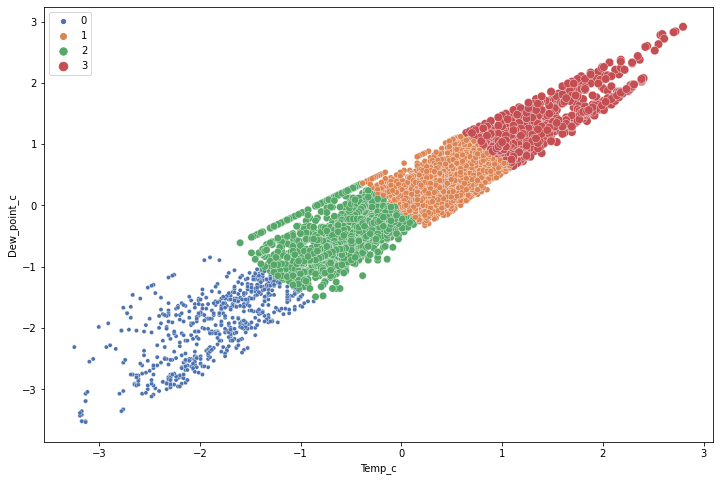

In [76]:
plt.figure(figsize = (12,8))
sns.scatterplot(df_clustering['Temp_c'], df_clustering['Dew_point_c'], hue = km.labels_, palette="deep", 
                size=km.labels_)

### Just looking at what the original labels suggest

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temp_c', ylabel='Dew_point_c'>

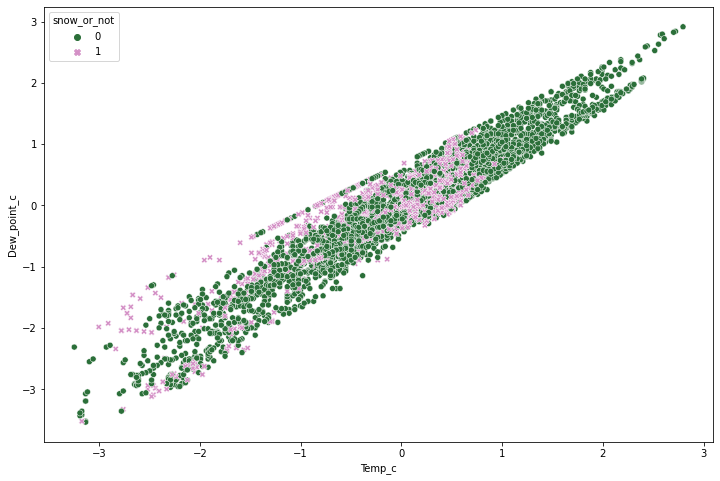

In [77]:
plt.figure(figsize = (12,8))
sns.scatterplot(df_clustering['Temp_c'], df_clustering['Dew_point_c'], hue = df['snow_or_not'], palette="cubehelix",
               style = df['snow_or_not'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temp_c', ylabel='Dew_point_c'>

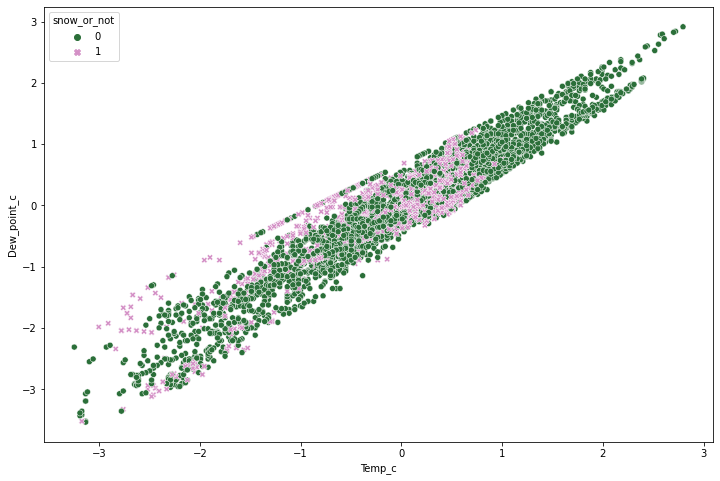

In [78]:
plt.figure(figsize = (12,8))
sns.scatterplot(df_clustering['Temp_c'], df_clustering['Dew_point_c'], hue = df['snow_or_not'], palette="cubehelix",
               style = df['snow_or_not'])

### Observations
#### after looking at the elbow graph and also the visual clusters in comparision with original labels in the data set

#### No.of clusters = 2 doesn't make any sense as the elbow graph suggests we can still minimize the within sum of squares and also the clustered groupd doesn't coincide at all with the visualization containing original lables for snow prediction.

#### Number of clusters as 3 and 4 should be evaluated with atmost consideration because both of them have lower values of within sum of squares distance(comparatively 4 having lower values understandably). Looking at both the graphs closely

#### 3 cluster graph --> clusters have good amount of variablity(might not be having more inter cluster distances) and grouped based on Higher values of both Temperature and dew point on one cluster, medium values in the other, lower values in the third cluster. All the data points above (1,1) mathches with original labels. values below (-1,-1) has considerable amount of randomness and values between (-1,-1) and (0,0) also this graph is not categorizing them good enough.

#### 4 cluster graph --> clusters have good amount of variablity(might not be having more inter cluster distances) and grouped based on Higher values of both Temperature and dew point on one cluster, medium range values have been divide into two clusters {values from (-1,-1) to (0,0) in second cluster, (0,0) to (1,1) in the third cluster}, lower values in the third cluster. All the data points above (1,1) mathches with original labels. values below (-1,-1) has considerable amount of randomness and values between (-1,-1) and (0,0) matches with original lables which shows no snow for most of the data points. Coming to the last cluster, values between (0,0) and (1,1) matches with original lables which shows there is a chance of snow for most of the data points.

## Comparing 3 vs 4 clusters
### For data points above (1,1) and below (-1,-1) both do reasonably well.
### For data points between (-1,-1) and (1,1) --> no.of clusters = 4 seems to be doing a better job.

## I will conclude that partitioning the data into 4 clusters will help the most for this problem.

## How is clustering useful in my dataset

### Found that conditions at temperatures and dew point values above 1(~approx) degree celcius comes under one category, Values below those are a different set in which you have varying conditions for snow. 
 
### There is a high chance that snow might occurr when temperature and Dew_point values in celsius are around zero to one degrees

### When temperatures are Dew_point values in celsius are more than 1.5 degrees, it's ver rare that you encounter snowfall

### When temperatures are Dew_point values in celsius are less than 0 degrees there's certain amount of variability if it snows or not, at these conditions consider other factors that affect the chances of snowfall.

### Clustering on different columns

In [79]:
df[['Temp_c','Cloud','Feels_like_c','Dew_point_c']].to_csv('numericals.csv')

In [80]:
df_c = pd.read_csv('numericals.csv')
df_c.drop('Unnamed: 0', axis = 1, inplace = True)
df_c.head()

,Temp_c,Cloud,Feels_like_c,Dew_point_c
0,-7.0,0.714286,0,-12.2
1,-6.7,0.688312,0,-11.9
2,-6.4,0.662338,0,-11.5
3,-5.4,0.545455,0,-10.6
4,-5.0,0.532468,0,-10.0


In [81]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
temp = sc.fit_transform(df_c)

In [82]:
df_c = pd.DataFrame(temp, columns = df_c.columns)
df_c.head()

,Temp_c,Cloud,Feels_like_c,Dew_point_c
0,-0.814834,0.114151,-1.617042,-0.757056
1,-0.758722,-0.004631,-1.617042,-0.712269
2,-0.702611,-0.123414,-1.617042,-0.652554
3,-0.515573,-0.657934,-1.617042,-0.518195
4,-0.440757,-0.717326,-1.617042,-0.428622


In [83]:
inertias = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters = k).fit(df_c)
    inertias.append(kmeanModel.inertia_)

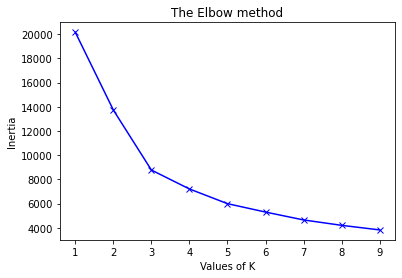

In [84]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow method')
plt.show()

### By seeing the elbow graph we can say that either 3 or 4 might be the best value for the number of clusters

In [85]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, max_iter = 200)
km.fit(df_c)
label = km.predict(df_c)

In [86]:
np.unique(label, return_counts = True)

(array([0, 1, 2], dtype=int32), array([2466, 1424, 1150]))

In [87]:
km.cluster_centers_

array([[ 0.37998898,  0.58916061,  0.68441148,  0.37538354],
       [ 0.45547672, -1.08793684, -1.17029861,  0.47344807],
       [-1.37882755,  0.08378434, -0.01848129, -1.3912051 ]])

In [88]:
df_c.columns

Index(['Temp_c', 'Cloud', 'Feels_like_c', 'Dew_point_c'], dtype='object')

### Cluster 1 --> High temp, High cloud, Higher Feels_like_c values, Medium values of Dew_point values
### Cluster 2 --> High temp, lower cloud, lower Feels_like_c values, Medium values of Dew_point values
### Cluster 3 --> Lower temp, Lower cloud, Lower Feels_like_c values, Low values of Dew_point values

## These set of clusters are similar climatic conditions --> we can infer that Temperature is directly proportional to the amount of cloudy conditions at that instance which is somewhat similar to Humidity and when there are low cloud values, temperature feels more colder.

In [89]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
reduced_df = pd.DataFrame(data = pca.fit_transform(df_c), columns = ['PCA1', 'PCA2'])
centers = pca.transform(km.cluster_centers_)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


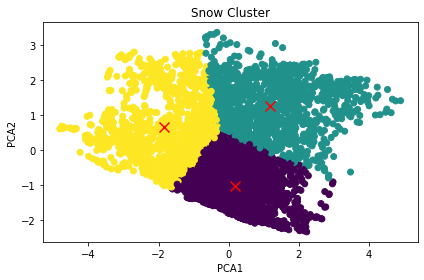

In [90]:
plt.scatter(reduced_df['PCA1'],reduced_df['PCA2'],c = km.labels_)
plt.scatter(centers[:,0],centers[:,1],marker ='x', s = 100, c = 'red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Snow Cluster')
plt.tight_layout()

In [91]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 4, max_iter = 200)
km.fit(df_c)
label = km.predict(df_c)

In [92]:
np.unique(label, return_counts = True)

(array([0, 1, 2, 3], dtype=int32), array([1025,  882, 2422,  711]))

In [93]:
km.cluster_centers_

array([[-0.53398473, -0.48925414, -1.02757051, -0.56506219],
       [ 0.88588175, -1.31788907, -1.14397675,  0.93922015],
       [ 0.38373451,  0.60047673,  0.6960481 ,  0.37872375],
       [-1.63643448,  0.30159701,  0.53702171, -1.64085732]])

In [94]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
reduced_df = pd.DataFrame(data = pca.fit_transform(df_c), columns = ['PCA1', 'PCA2'])
centers = pca.transform(km.cluster_centers_)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


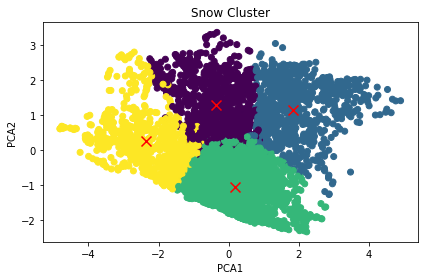

In [95]:
plt.scatter(reduced_df['PCA1'],reduced_df['PCA2'],c = km.labels_)
plt.scatter(centers[:,0],centers[:,1],marker ='x', s = 100, c = 'red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Snow Cluster')
plt.tight_layout()

In [96]:
km.cluster_centers_

array([[-0.53398473, -0.48925414, -1.02757051, -0.56506219],
       [ 0.88588175, -1.31788907, -1.14397675,  0.93922015],
       [ 0.38373451,  0.60047673,  0.6960481 ,  0.37872375],
       [-1.63643448,  0.30159701,  0.53702171, -1.64085732]])

In [97]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_values = silhouette_samples(df_c, label)
silhouette_values

array([0.48817652, 0.51664624, 0.52823894, ..., 0.5816481 , 0.55055251,
       0.50396323])

In [98]:
silhouette_score(df_c, label)

0.37092780944593995

In [99]:
!pip install yellowbrick

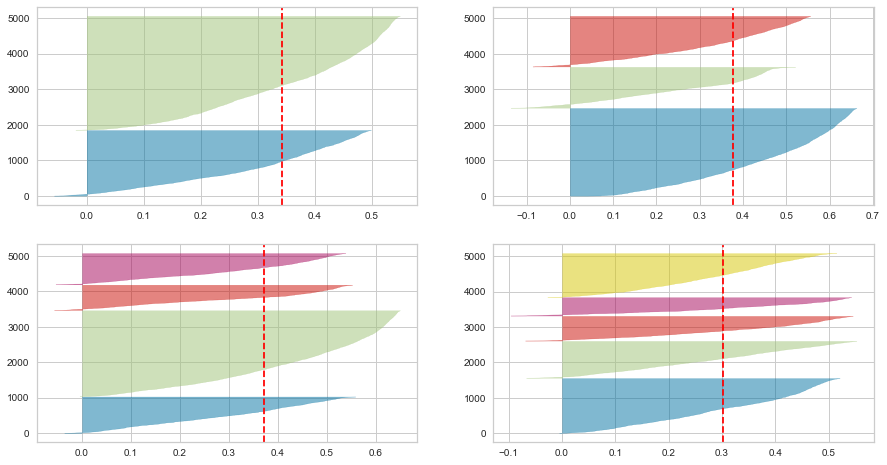

In [100]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_c)

In [101]:
import sklearn.cluster as cluster
import sklearn.metrics as metrics
SK = range(2,10)
sil_score = []
for i in SK:
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(df_c).labels_
    score = metrics.silhouette_score(df_c,labels,metric="euclidean",sample_size=1000,random_state=200)
    sil_score.append(score)

In [102]:
sil_centers = pd.DataFrame({'Clusters' : SK, 'Sil Score' : sil_score})
sil_centers

,Clusters,Sil Score
0,2,0.343641
1,3,0.380634
2,4,0.379913
3,5,0.315377
4,6,0.311135
5,7,0.315852
6,8,0.314471
7,9,0.314511


<AxesSubplot:xlabel='Clusters', ylabel='Sil Score'>

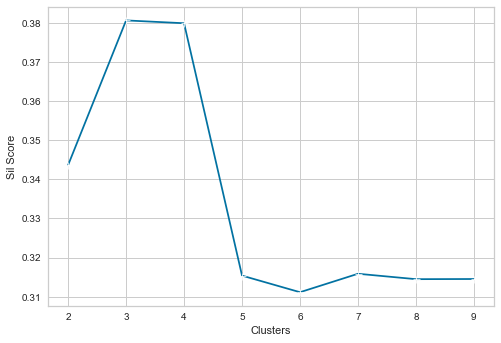

In [103]:
sns.lineplot(x = 'Clusters', y = 'Sil Score', data = sil_centers, marker="+")

## By Observing the Kmeans and silheoutte we can say that two values of number of clusters  --> 3 and 4 are both optimal and silhouette scores show that k = 3 is slightly better than k = 4 and also no.of clusters = 3 makes more sense as we can infer some reliable information from that. 

## Creating Transactions data to work with Association Rule Mining

In [104]:
df.head()

,Temp_c,Wind_mph,Wind_degree,Precip_mm,Visib_miles,Humidity,Cloud,Feels_like_c,Dew_point_c,UV,Chance_of_rain,Chance_of_snow,N,S,W,Visib_miles_bin,rain_or_not,snow_or_not
0,-7.0,5.6,0.719444,1,0.0,6.0,0.714286,0,-12.2,-10.3,0,0,0,0,1,1,0,0
1,-6.7,5.6,0.708333,1,0.0,6.0,0.688312,0,-11.9,-10.3,0,0,0,0,1,1,0,0
2,-6.4,5.8,0.688889,1,0.0,6.0,0.662338,0,-11.5,-10.5,0,0,0,0,1,1,0,0
3,-5.4,5.6,0.694444,1,0.0,6.0,0.545455,0,-10.6,-11.1,0,0,0,0,1,1,0,0
4,-5.0,5.6,0.700000,1,0.0,6.0,0.532468,0,-10.0,-10.8,0,0,0,0,1,1,0,0


In [105]:
df['Precip_mm'].value_counts()

1    3277
2    1620
3     142
Name: Precip_mm, dtype: int64

In [106]:
df.nunique()

Temp_c             300
Wind_mph           130
Wind_degree        361
Precip_mm            3
Visib_miles         48
Humidity             7
Cloud               78
Feels_like_c       101
Dew_point_c        376
UV                 291
Chance_of_rain      63
Chance_of_snow      72
N                    2
S                    2
W                    2
Visib_miles_bin      3
rain_or_not          2
snow_or_not          2
dtype: int64

In [107]:
df.describe()

,Temp_c,Wind_mph,Wind_degree,Visib_miles,Humidity,Cloud,Feels_like_c,Dew_point_c,UV,Chance_of_rain,Chance_of_snow,N,S,W,rain_or_not,snow_or_not
count,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000
mean,-2.643492,9.217341,0.537577,1.037238,4.584722,0.689324,62.382540,-7.128889,-6.816369,6.083532,17.812698,0.269841,0.262698,0.312897,0.099206,0.278373
std,5.347029,5.600060,0.279365,2.117256,2.034034,0.218691,38.582007,6.699129,5.667752,19.263106,30.478323,0.443921,0.440144,0.463719,0.298969,0.448243
min,-20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-30.800000,-22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.700000,4.900000,0.288889,0.000000,3.000000,0.545455,20.000000,-10.500000,-10.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.900000,8.300000,0.611111,0.090000,6.000000,0.714286,78.000000,-6.100000,-6.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.800000,12.300000,0.755556,1.360000,6.000000,0.883117,100.000000,-2.800000,-2.800000,0.000000,27.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,12.300000,30.200000,1.000000,18.790000,6.000000,1.000000,100.000000,12.400000,8.300000,89.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [108]:
df['temp_binned']=pd.cut(x=df['Temp_c'], bins=[-20,-5.7,0.8,12.3], labels = ['Low_temp', 'Med_temp', 'High_temp'])
df['cloud_binned']=pd.cut(x=df['Cloud'], bins=[0,0.54,0.88,1], labels = ['Low_cloud', 'Med_cloud', 'High_cloud'])
df['Dew_point_binned']=pd.cut(x=df['Dew_point_c'], bins=[-30,-10.5,-2.8,12.4], 
                               labels = ['Low_Dew_point', 'Med_Dew_point', 'High_Dew_point'])

In [109]:
df['rain'] = np.where(df['rain_or_not'] == 0, 'no_rain', 'chance_of_rain')
df['snow'] = np.where(df['snow_or_not'] == 0, 'no_snow', 'chance_of_snow')

In [110]:
df_arm = df[['temp_binned', 'cloud_binned', 'Dew_point_binned', 'rain', 'snow']]
df_arm.head()

,temp_binned,cloud_binned,Dew_point_binned,rain,snow
0,Low_temp,Med_cloud,Low_Dew_point,no_rain,no_snow
1,Low_temp,Med_cloud,Low_Dew_point,no_rain,no_snow
2,Low_temp,Med_cloud,Low_Dew_point,no_rain,no_snow
3,Med_temp,Med_cloud,Low_Dew_point,no_rain,no_snow
4,Med_temp,Low_cloud,Med_Dew_point,no_rain,no_snow


In [111]:
for each in df_arm.columns:
    print(df_arm[each].value_counts())
    print('--------------------------------------')

Med_temp     2521
Low_temp     1279
High_temp    1239
Name: temp_binned, dtype: int64
--------------------------------------
Med_cloud     2517
High_cloud    1307
Low_cloud     1214
Name: cloud_binned, dtype: int64
--------------------------------------
Med_Dew_point     2525
Low_Dew_point     1263
High_Dew_point    1246
Name: Dew_point_binned, dtype: int64
--------------------------------------
no_rain           4540
chance_of_rain     500
Name: rain, dtype: int64
--------------------------------------
no_snow           3637
chance_of_snow    1403
Name: snow, dtype: int64
--------------------------------------


In [112]:
transactions = df_arm[['temp_binned','cloud_binned','Dew_point_binned','rain','snow']]
transactions_list = transactions.values.tolist()

In [113]:
transactions_list

[['Low_temp', 'Med_cloud', 'Low_Dew_point', 'no_rain', 'no_snow'],
 ['Low_temp', 'Med_cloud', 'Low_Dew_point', 'no_rain', 'no_snow'],
 ['Low_temp', 'Med_cloud', 'Low_Dew_point', 'no_rain', 'no_snow'],
 ['Med_temp', 'Med_cloud', 'Low_Dew_point', 'no_rain', 'no_snow'],
 ['Med_temp', 'Low_cloud', 'Med_Dew_point', 'no_rain', 'no_snow'],
 ['Med_temp', 'Low_cloud', 'Med_Dew_point', 'no_rain', 'no_snow'],
 ['Med_temp', 'Low_cloud', 'Med_Dew_point', 'no_rain', 'no_snow'],
 ['Med_temp', 'Low_cloud', 'Med_Dew_point', 'no_rain', 'no_snow'],
 ['Med_temp', 'Med_cloud', 'Med_Dew_point', 'no_rain', 'no_snow'],
 ['Med_temp', 'Med_cloud', 'Med_Dew_point', 'no_rain', 'no_snow'],
 ['Med_temp', 'Med_cloud', 'Med_Dew_point', 'no_rain', 'no_snow'],
 ['High_temp', 'Med_cloud', 'High_Dew_point', 'no_rain', 'no_snow'],
 ['High_temp', 'Med_cloud', 'High_Dew_point', 'no_rain', 'no_snow'],
 ['High_temp', 'Med_cloud', 'High_Dew_point', 'no_rain', 'no_snow'],
 ['High_temp', 'Med_cloud', 'High_Dew_point', 'no_rain',

In [114]:
import csv

# Save transaction list as CSV file
with open('transactions.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(transactions_list)